In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls_name: idx for idx, cls_name in
        enumerate(self.classes)}
        self.images = []
        for cls_name in self.classes:
            cls_dir = os.path.join(root_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                self.images.append((os.path.join(cls_dir, img_name),
                self.class_to_idx[cls_name]))

    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [23]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize(96),
    transforms.CenterCrop(96),
    transforms.ToTensor()
])

custom_data = CustomDataset(root_dir='./data/plants', transform=transform)
data_loader = DataLoader(dataset=custom_data, batch_size=5, shuffle=True)

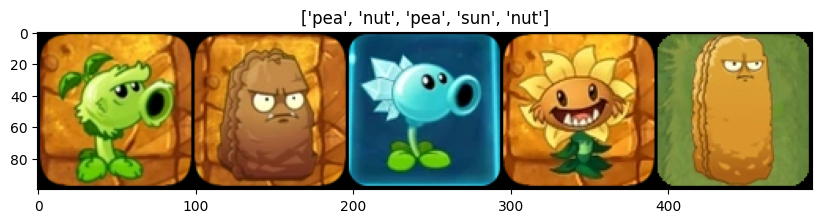

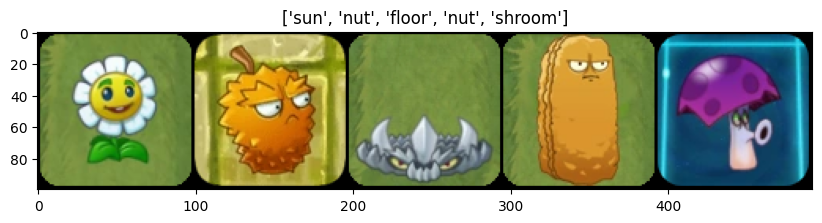

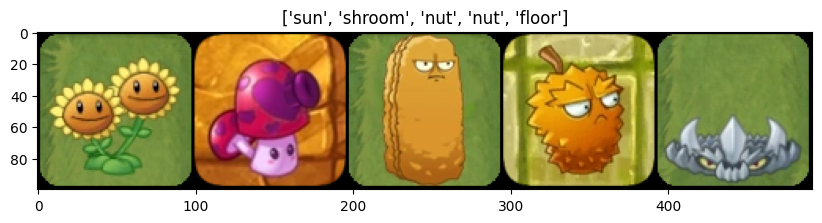

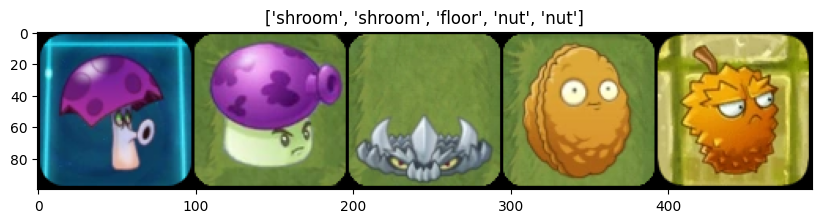

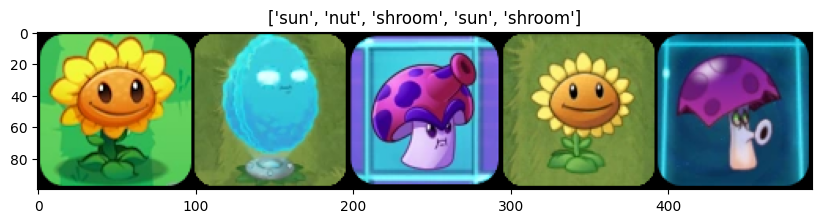

In [24]:
import matplotlib.pyplot as plt
import torchvision

def show_batch(loader, dataset):
    idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}
    
    for _ in range(len(data_loader)):
        images, labels = next(iter(loader))
        grid = torchvision.utils.make_grid(images)
        class_names = [idx_to_class[label.item()] for label in labels]
        plt.figure(figsize=(10, 10))
        plt.imshow(grid.permute(1, 2, 0))
        plt.title(class_names)
        plt.show()
    
show_batch(data_loader, custom_data)